In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,143 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122400 files and di

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

plt.rc('font', family='NanumGothic')
plt.rc('font', size=15)
plt.rc('axes', unicode_minus=False)

In [97]:
df = pd.read_csv('/content/drive/MyDrive/deu2/4월_프로젝트/dataset/4_26data.csv')
df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,1,1,1,2194.00,2.7,15.0,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,1,1,1,48.00,4.8,259.0,5.9,1024.0,36.0,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,1,4,9,190.00,11.9,316.0,15.6,1021.8,53.0,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,4,2,1,139.00,12.9,33.0,15.6,1016.5,69.0,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,3,7,1,1.98,7.2,32.0,9.0,1019.8,74.0,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,0,1,1,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,0,1,3,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,0,1,1,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,0,1,3,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [98]:
print(df['발생유형'].value_counts(),'\n')

0    4973
1     840
Name: 발생유형, dtype: int64 



In [ ]:
from sklearn.utils import resample

# 클래스별로 데이터셋 분리
class_0 = df[df['발생유형'] == 1]
class_1 = df[df['발생유형'] == 0]

# 클래스별로 데이터셋의 개수 확인
print("Class 0 count:", len(class_0))
print("Class 1 count:", len(class_1))

# 클래스 0 데이터셋 업샘플링
class_0_resampled = resample(class_0, n_samples=len(class_1), random_state=42)

# 업샘플링된 클래스 0 데이터셋과 클래스 1 데이터셋을 합쳐 새로운 데이터프레임 생성
resampled_df = pd.concat([class_0_resampled, class_1])

Class 0 count: 840
Class 1 count: 4973


In [ ]:
resampled_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
102,1,2,1,6,1500.00,8.0,53.0,10.6,1019.5,69.0,20.7,22.1,1.8,1.0,0.5,4.9,252.0
435,1,3,1,1,9.77,3.5,261.0,4.7,1016.4,69.0,9.5,13.8,1.1,0.6,0.4,3.4,235.0
270,1,2,1,1,7.93,5.0,7.0,6.5,1027.4,57.0,1.2,4.9,1.3,1.0,0.7,5.8,152.0
106,1,2,1,7,3.71,8.4,80.0,10.0,1014.3,54.0,23.3,24.1,1.4,1.0,0.5,4.6,251.0
71,1,5,1,1,2.68,3.2,343.0,5.3,1002.2,93.0,23.9,21.5,0.2,0.1,0.1,3.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,0,1,1,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,0,1,3,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,0,1,1,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,0,1,3,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
print(resampled_df['발생유형'].value_counts(),'\n')

1    4973
0    4973
Name: 발생유형, dtype: int64 



In [ ]:
resampled_df[:500]

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
102,1,2,1,6,1500.00,8.0,53.0,10.6,1019.5,69.0,20.7,22.1,1.8,1.0,0.5,4.9,252.0
435,1,3,1,1,9.77,3.5,261.0,4.7,1016.4,69.0,9.5,13.8,1.1,0.6,0.4,3.4,235.0
270,1,2,1,1,7.93,5.0,7.0,6.5,1027.4,57.0,1.2,4.9,1.3,1.0,0.7,5.8,152.0
106,1,2,1,7,3.71,8.4,80.0,10.0,1014.3,54.0,23.3,24.1,1.4,1.0,0.5,4.6,251.0
71,1,5,1,1,2.68,3.2,343.0,5.3,1002.2,93.0,23.9,21.5,0.2,0.1,0.1,3.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,1,2,1,1,29.00,2.9,78.0,4.4,1006.0,78.0,23.8,21.9,1.8,1.2,0.6,8.0,52.0
822,1,6,1,1,82.00,8.5,163.0,10.7,1027.4,73.0,10.6,11.0,1.8,1.1,0.8,7.1,104.0
819,1,6,1,1,2.30,8.6,20.0,10.2,1025.3,52.0,11.0,12.3,0.8,0.5,0.4,2.5,35.0
655,1,2,4,9,1683.00,11.3,136.0,13.7,1016.7,93.0,13.8,13.8,3.0,1.9,1.4,4.9,161.0


In [ ]:
resampled_df.columns

Index(['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

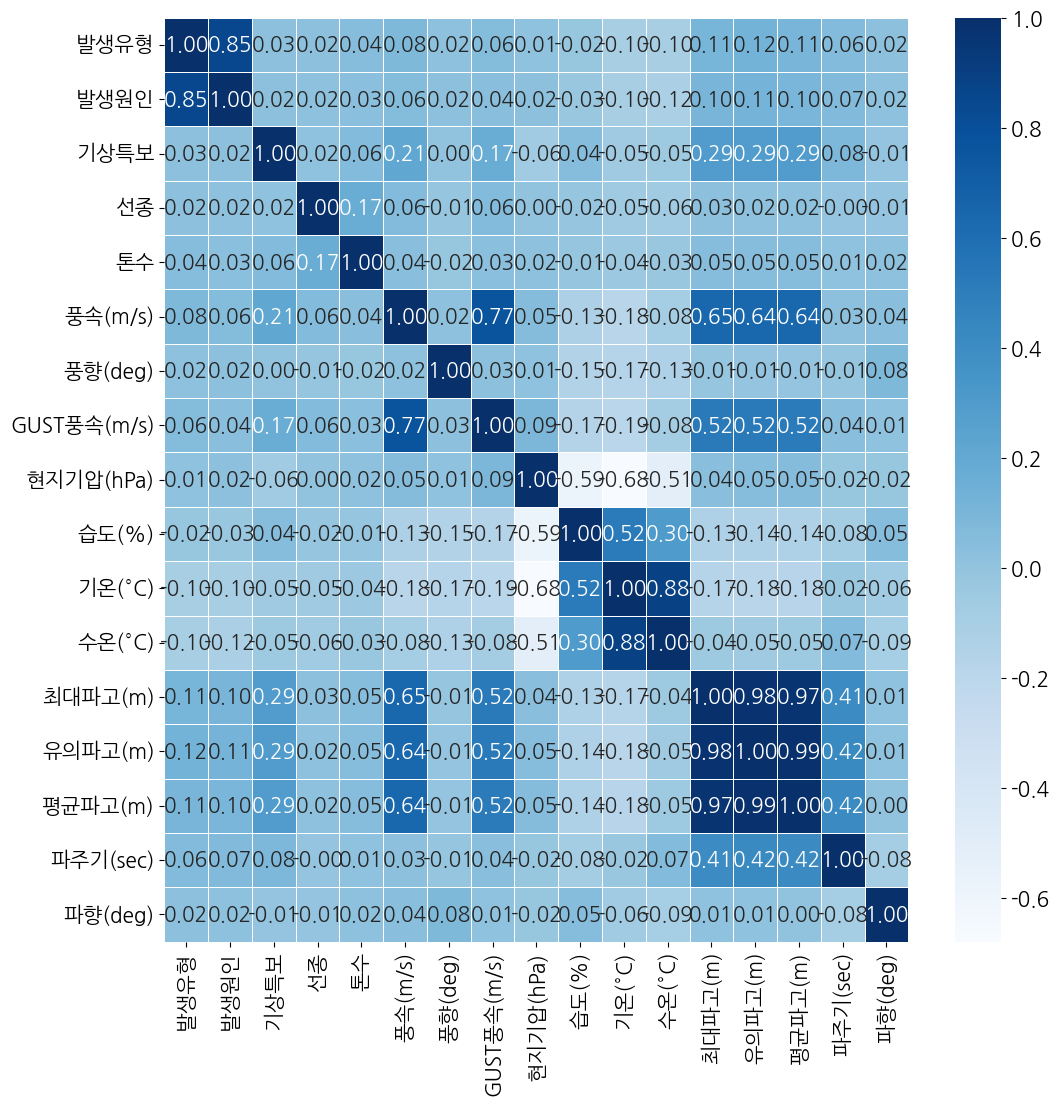

In [ ]:
# 상관관계 시각화
heat = df[[ '발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

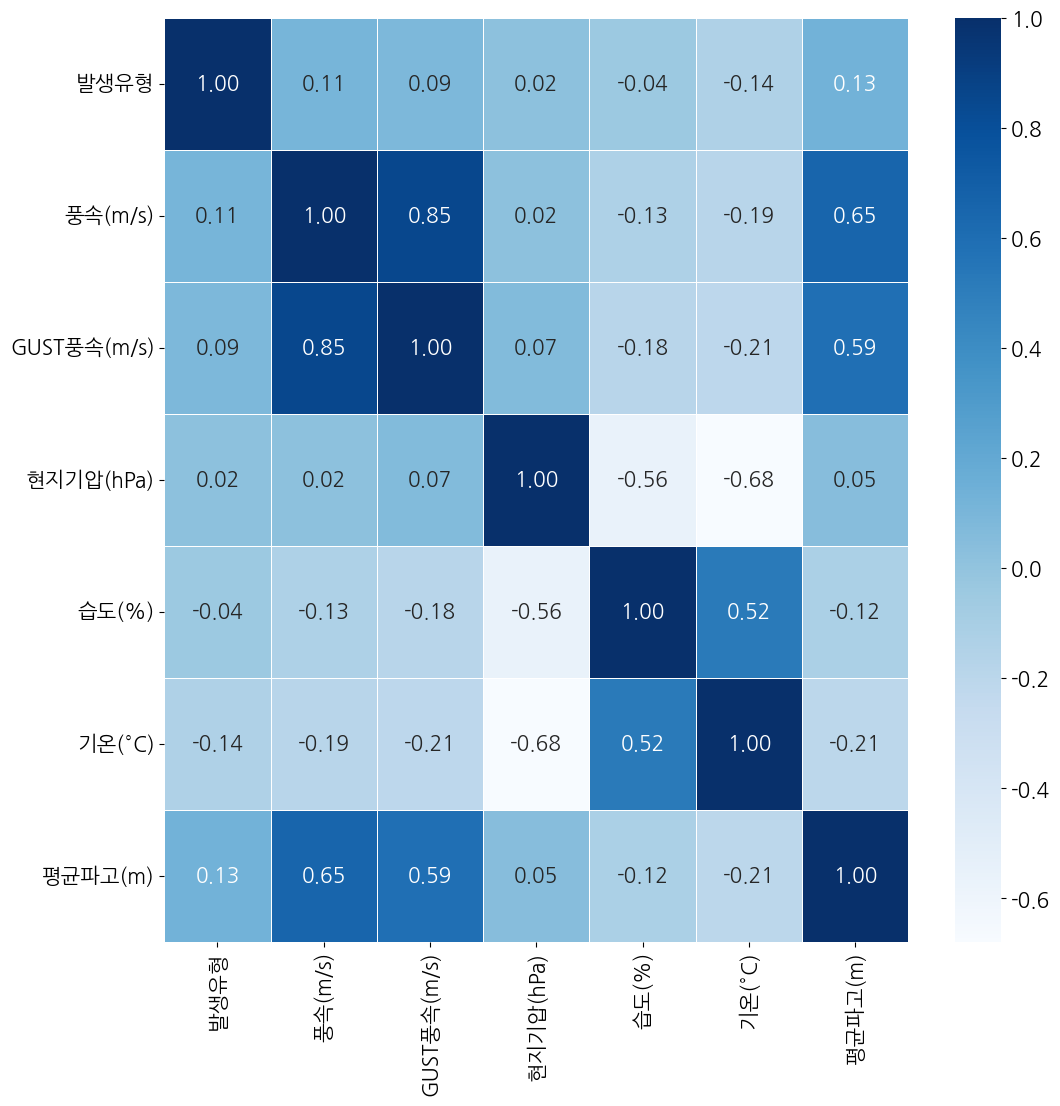

In [ ]:
# 상관관계 시각화
#'발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
 #      '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
#       '평균파고(m)', '파주기(sec)', '파향(deg)'
heat = resampled_df[[ '발생유형','풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '평균파고(m)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [111]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [112]:
# 모델 정의 
random_state = 42

Logistic = LogisticRegression()
rdforest = RandomForestClassifier(random_state=random_state)
tree = DecisionTreeClassifier(random_state=random_state)
svc = SVC(kernel='linear')
xgboost = XGBClassifier(random_state=random_state)
gnb = GaussianNB()
gb = GradientBoostingClassifier(random_state=random_state)

models = [Logistic, rdforest, tree, svc, xgboost, gnb, gb]

In [115]:
# 여러 모델 한번에 학습 평가 함수
def get_scores(models, X_scaler, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=random_state)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        roc_auc = roc_auc_score(y_test, y_pred)
        
        df[model_name] = [accuracy, precision, recall, f1, roc_auc]
        
        #scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
        #print(f"{model_name} : Cross-validation scores:", scores)
      #  print(f"{model_name} : Average score:", scores.mean())

    score_df = pd.DataFrame(df, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']).transpose().sort_values('F1 Score', ascending = False)
            
    return score_df
get_scores(models, X_scaler, y)

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
RandomForestClassifier,0.852966,0.818123,0.562544,0.572505,0.562544
XGBClassifier,0.828891,0.632236,0.546038,0.549306,0.546038
GradientBoostingClassifier,0.843508,0.749771,0.535576,0.527708,0.535576
GaussianNB,0.813414,0.569890,0.528269,0.525380,0.528269
DecisionTreeClassifier,0.739467,0.522405,0.522500,0.522452,0.522500
LogisticRegression,0.837489,0.418745,0.500000,0.455779,0.500000
SVC,0.837489,0.418745,0.500000,0.455779,0.500000


In [116]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [117]:
# 모델 정의 
random_state = 42

Logistic = LogisticRegression()
rdforest = RandomForestClassifier(random_state=random_state)
tree = DecisionTreeClassifier(random_state=random_state)
svc = SVC(kernel='linear', probability=True)
xgboost = XGBClassifier(random_state=random_state)
gnb = GaussianNB()
gb = GradientBoostingClassifier(random_state=random_state)

models = [Logistic, rdforest, tree, svc, xgboost, gnb, gb]

In [118]:
def get_scores(models, X_scaler, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=random_state)
        
        model.fit(X_train, y_train)
        
        # 임계값을 0.4로 설정하여 예측
        y_scores = model.predict_proba(X_test)[:, 1] # 1번째 클래스의 예측 확률값 사용
        y_pred = (y_scores > 0.4).astype(int)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        
        df[model_name] = [accuracy, precision, recall, f1]
        
        #scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
        #print(f"{model_name} : Cross-validation scores:", scores)
        #print(f"{model_name} : Average score:", scores.mean())

    score_df = pd.DataFrame(df, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).transpose().sort_values('F1 Score', ascending = False)
            
    return score_df

get_scores(models, X_scaler, y)

,Accuracy,Precision,Recall,F1 Score
RandomForestClassifier,0.836629,0.672350,0.557055,0.565027
XGBClassifier,0.819433,0.605551,0.546788,0.551351
GradientBoostingClassifier,0.844368,0.741645,0.544618,0.543806
GaussianNB,0.804815,0.573632,0.540193,0.543384
DecisionTreeClassifier,0.739467,0.522405,0.522500,0.522452
LogisticRegression,0.836629,0.585632,0.501619,0.460691
SVC,0.837489,0.418745,0.500000,0.455779


In [119]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = rf.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.8512467755803955
precision: 0.7950164122336268
recall: 0.5615174429342807
f1: 0.5709759067230455


In [120]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier(random_state=42)

# 그리디 서치를 위한 하이퍼파라미터 그리드 생성
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# 그리디 서치 객체 생성

gs = GridSearchCV(rf, param_grid, cv=5)

# 그리디 서치 수행
gs.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best hyperparameters:', gs.best_params_)

# 테스트 데이터로 예측 수행
y_pred = gs.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy:', accuracy)
print('precision:', precision_score)
print('recall:', recall_score)
print('f1:', f1_score)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8503869303525365
precision: <function precision_score at 0x7f711d592280>
recall: <function recall_score at 0x7f711d592310>
f1: <function f1_score at 0x7f711d642e50>


In [121]:
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.8503869303525365
precision: 0.8537027770828121
recall: 0.5460790065512858
f1: 0.544598973805023


In [ ]:
input_data = np.array([[15.5, 20.9, 1011.9, 75, 9.4, 1.6]])

# 확률 값 예측
proba = gs.predict_proba(input_data)

# 결과 출력
print('Prediction: {:.2f}%'.format(proba[0][1] * 100))

Prediction: 14.45%


In [ ]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의
xgb = XGBClassifier(random_state=random_state)

# 그리디 서치를 위한 하이퍼파라미터 그리드 생성
xgb_params = {'n_estimators': [100, 300, 500,1000],
              'max_depth': [3, 5, 7,10],
              'learning_rate': [0.01, 0.1, 0.5, 1.0]}

# 그리디 서치 객체 생성

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)

# 그리디 서치 수행
xgb_grid.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best hyperparameters:', xgb_grid.best_params_)

# 테스트 데이터로 예측 수행
y_pred = xgb_grid.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Accuracy: 0.8452278589853827
precision: 0.7142857142857143
recall: 0.07936507936507936
f1: 0.14285714285714282


In [ ]:
# 관측년도, 관측월, 정점명으로 그룹화
X = df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = df['발생유형']

# 정규화 (MinMaxScaler, StandardScaler)
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 모델 정의 
random_state = 42

# Logistic Regression 모델
lr_params = {'penalty': ['l1', 'l2'],
             'C': [0.1, 0.5, 1.0, 5.0, 10.0]}
lr = LogisticRegression(random_state=random_state)
lr_grid = GridSearchCV(lr, lr_params, cv=5, n_jobs=-1)

# Random Forest 모델
rf_params = {'n_estimators': [100, 300, 500],
             'max_depth': [3, 5, 7],
             'min_samples_split': [2, 4, 6]}
rf = RandomForestClassifier(random_state=random_state)
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)

# Decision Tree 모델
dt_params = {'max_depth': [3, 5, 7],
             'min_samples_split': [2, 4, 6]}
dt = DecisionTreeClassifier(random_state=random_state)
dt_grid = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)

# SVM 모델
svm_params = {'C': [0.1, 0.5, 1.0, 5.0, 10.0]}
svm = SVC(kernel='linear', random_state=random_state)
svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)

# XGBoost 모델
xgb_params = {'n_estimators': [100, 300, 500],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0]}
xgb = XGBClassifier(random_state=random_state)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)

# Naive Bayes 모델
gnb = GaussianNB()

# Gradient Boosting 모델
gb_params = {'n_estimators': [100, 300, 500],
             'max_depth': [3, 5, 7]}
gb = GradientBoostingClassifier(random_state=random_state)
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1)

models = [('Logistic Regression', lr_grid),
          ('Random Forest', rf_grid),
          ('Decision Tree', dt_grid),
          ('SVM', svm_grid),
          ('XGBoost', xgb_grid),
          ('Naive Bayes', gnb),
          ('Gradient Boosting', gb_grid)]

# 여러 모델 한번에 학습 평가 함수
def get_scores(models, X_scaler, y):
    df = {}
    
    for model_name, model in models:
        model.fit(X_scaler, y)
        y_pred = model.predict(X_scaler)
        
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        
        df[model_name] = [accuracy, precision, recall, f1]
        
        # 교차 검증 수행
        scores = cross_val_score(model, X_scaler, y, cv=5)
        avg_score = np.mean(scores)
        std_score = np.std(scores)
        df[model_name + " (CV)"] = [avg_score, std_score]
        
    score_df = pd.DataFrame(df, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).transpose().sort_values('F1 Score', ascending = False)
    
    return score_df
get_scores(models, X_scaler, y)

ValueError: ignored

In [ ]:
# 모델 학습에 필요한 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 독립변수 선택
# 예시: "가해자_당사자종별"과 "피해자_당사자종별"을 독립변수로 선택
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']

# 데이터 분리 (학습용 데이터와 검증용 데이터로 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

# 학습 데이터를 기반으로 스케일링
X_train_scaler = scaler.fit_transform(X_train)

# 검증 데이터를 스케일링
X_test_scaler = scaler.transform(X_test)

# 모델 학습
#model = LinearRegression()
#model.fit(X_train, y_train)
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# R-squared 계산
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.2f}')

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# rf_score 계산
rf_score = model.score(X_test, y_test)
print(f'rf_score: {rf_score:.2f}')

print("\n")
# 임의의 데이터를 예측에 사용
#input_data = np.array([[5,2.7, 4.9, 1028.6, 58, 8.6, 0.7]])
# [9.9, 13.3, 1018.1, 65, 11.4, 0.6]]) # 화재 2.7, 4.9, 1028.6, 58, 8.6, 0.7 : 7.2, 9, 1019.8, 74, 15.8, 1.6 : 4.8 , 5.9, 1024, 36, 7.3, 0.9
#비화재 15.5, 20.9, 1011.9, 75, 9.4, 1.6
X_newa = [[7.2, 9, 1019.8, 74, 15.8, 1.6]] #'풍속(m/s)' : 2.7 , 'GUST풍속(m/s)' : 4.9 , '현지기압(hPa)' : 1028.6, '습도(%)' : 58, '기온(°C)' : 8.6, '평균파고(m)' : 0.7
X_new_scalera = scaler.transform(X_newa)
y_preda = model.predict(X_new_scalera)

# feature 중요도 분석
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도가 높은 feature 10개 출력
top_k = 6
for i in range(top_k):
    print(f"{i+1}. feature {indices[i]} ({importances[indices[i]]:.3f})")

#scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("\n")
# Cross Validation 평균 성능 및 표준편차 출력
#print("Cross Validation R^2 Scores: ", scores)
#print("Average R^2 Score: ", np.mean(scores))
#print("Standard Deviation of R^2 Scores: ", np.std(scores))

print(f"발생유형의 화재 발생 확률은 {y_preda[0]*100:.2f}%입니다.")

R-squared: 0.83
MSE: 0.04
MAE: 0.13
rf_score: 0.83


1. feature 4 (0.219)
2. feature 2 (0.202)
3. feature 3 (0.162)
4. feature 5 (0.141)
5. feature 1 (0.140)
6. feature 0 (0.136)


발생유형의 화재 발생 확률은 20.00%입니다.


In [ ]:
#그리디 서치
# 데이터 전처리
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 하이퍼파라미터 튜닝
param_dist = {
    'n_estimators': [25, 50, 100, 200, 400, 600, 800, 1000],
    'max_depth': [3, 5, 7, 10, 15,20,25, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40],
    'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 25],
}

model = RandomForestRegressor(random_state=42)
# 그리디 서치를 사용한 최적의 하이퍼파라미터 찾기
rf_greedy_search = GridSearchCV(estimator=model, param_grid=param_dist, cv=5)
rf_greedy_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best Parameters:', rf_greedy_search.best_params_)

# 최적의 모델로 평가
best_model = rf_greedy_search.best_estimator_
y_pred = best_model.predict(X_test_scaler)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rf_score = best_model.score(X_test_scaler, y_test)

scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Cross Validation 평균 성능 및 표준편차 출력
print("Cross Validation R^2 Scores: ", scores)
print("Average R^2 Score: ", np.mean(scores))
print("Standard Deviation of R^2 Scores: ", np.std(scores))
print("\n")
print(f'R-squared: {r_squared:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'rf_score: {rf_score:.2f}')

In [ ]:
#랜덤서치
# 데이터 전처리
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 하이퍼파라미터 튜닝
param_dist = {
    'n_estimators': [25, 50, 100, 200, 400, 600, 800, 1000],
    'max_depth': [3, 5, 7, 10, 15,20,25, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 40],
    'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 25],
}

model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_scaler, y_train)

# 최적의 하이퍼파라미터 출력
print('Best Parameters:', random_search.best_params_)

# 최적의 모델로 평가
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaler)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rf_score = best_model.score(X_test_scaler, y_test)

scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Cross Validation 평균 성능 및 표준편차 출력
print("Cross Validation R^2 Scores: ", scores)
print("Average R^2 Score: ", np.mean(scores))
print("Standard Deviation of R^2 Scores: ", np.std(scores))
print("\n")
print(f'R-squared: {r_squared:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'rf_score: {rf_score:.2f}')

Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 25}
Cross Validation R^2 Scores:  [0.        0.        0.7502935 0.        0.       ]
Average R^2 Score:  0.15005870096123392
Standard Deviation of R^2 Scores:  0.30011740192246783


R-squared: 0.75
MSE: 0.06
MAE: 0.20
rf_score: 0.75


In [ ]:
scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Cross Validation 평균 성능 및 표준편차 출력
print("Cross Validation R^2 Scores: ", scores)
print("Average R^2 Score: ", np.mean(scores))
print("Standard Deviation of R^2 Scores: ", np.std(scores))

Cross Validation R^2 Scores:  [0.        0.        0.7502935 0.        0.       ]
Average R^2 Score:  0.15005870096123392
Standard Deviation of R^2 Scores:  0.30011740192246783


In [ ]:
# 새로운 입력 데이터
new_data = [[15.5, 20.9, 1011.9, 75, 9.4, 1.6]]

# 입력 데이터를 스케일링
new_data_scaler = scaler.transform(new_data)

# 모델로 예측 수행
y_pred = best_model.predict(new_data_scaler)

# 예측 결과 출력
print(f"Predicted value: {y_pred[0]}")

Predicted value: 0.3661536985868449


In [ ]:
#그리디 서치
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']

# 데이터 전처리: 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리: 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# 그리디 서치를 사용한 랜덤 포레스트 회귀 분석에 사용할 하이퍼파라미터 공간 설정
param_dist = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
}

# 랜덤 포레스트 회귀 분석 모델 설정
rf = RandomForestRegressor(random_state=42)

# 그리디 서치를 사용한 최적의 하이퍼파라미터 찾기
rf_greedy_search = GridSearchCV(estimator=rf, param_grid=param_dist, cv=5)
rf_greedy_search.fit(X_train, y_train)

# 랜덤 포레스트 회귀 분석에서 최적의 하이퍼파라미터로 모델 생성
rf_best = rf_greedy_search.best_estimator_

# XGBoost 회귀 분석에 사용할 하이퍼파라미터 공간 설정
params = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}

# XGBoost 회귀 분석 모델 설정
xgb = XGBRegressor(random_state=42)

# 그리디 서치를 사용한 최적의 하이퍼파라미터 찾기
xgb_greedy_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5)
xgb_greedy_search.fit(X_train, y_train)


#XGBoost 회귀 분석에서 최적의 하이퍼파라미터로 모델 생성
xgb_best = xgb_greedy_search.best_estimator_

#랜덤 포레스트 회귀 분석 모델의 성능 측정
y_pred_rf = rf_best.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression - R^2 score: {:.4f}, MSE: {:.4f}, MAE: {:.4f}".format(r2_rf, mse_rf, mae_rf))

#XGBoost 회귀 분석 모델의 성능 측정
y_pred_xgb = xgb_best.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression - R^2 score: {:.4f}, MSE: {:.4f}, MAE: {:.4f}".format(r2_xgb, mse_xgb, mae_xgb))

In [ ]:
# 랜덤서치
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']

# 데이터 전처리: 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리: 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 분석에 사용할 하이퍼파라미터 공간 설정
param_dist = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
}

# 랜덤 포레스트 회귀 분석 모델 설정
rf = RandomForestRegressor(random_state=42)

# 랜덤 포레스트 회귀 분석 모델에 대한 최적의 하이퍼파라미터를 찾기 위한 랜덤 서치 수행
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# 랜덤 포레스트 회귀 분석에서 최적의 하이퍼파라미터로 모델 생성
rf_best = random_search.best_estimator_

# XGBoost 회귀 분석에 사용할 하이퍼파라미터 공간 설정
params = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}

# XGBoost 회귀 분석 모델 설정
xgb = XGBRegressor(random_state=42)

#XGBoost 회귀 분석 모델에 대한 최적의 하이퍼파라미터를 찾기 위한 랜덤 서치 수행
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv=5, n_iter=10, random_state=42)
xgb_random_search.fit(X_train, y_train)

#XGBoost 회귀 분석에서 최적의 하이퍼파라미터로 모델 생성
xgb_best = xgb_random_search.best_estimator_

#랜덤 포레스트 회귀 분석 모델의 성능 측정
y_pred_rf = rf_best.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression - R^2 score: {:.4f}, MSE: {:.4f}, MAE: {:.4f}".format(r2_rf, mse_rf, mae_rf))

#XGBoost 회귀 분석 모델의 성능 측정
y_pred_xgb = xgb_best.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression - R^2 score: {:.4f}, MSE: {:.4f}, MAE: {:.4f}".format(r2_xgb, mse_xgb, mae_xgb))

Random Forest Regression - R^2 score: 0.6577, MSE: 0.0855, MAE: 0.2473
XGBoost Regression - R^2 score: 0.8382, MSE: 0.0404, MAE: 0.0960


In [ ]:
# 새로운 입력 데이터
new_data = [[17.2, 15, 1029.8, 58, 14.8, 3.6]]

# 입력 데이터를 스케일링
new_data_scaler = scaler.transform(new_data)

# 모델로 예측 수행
y_pred_rf = rf_best.predict(new_data_scaler)

# 예측 결과 출력
print(f"Predicted value: {y_pred_rf[0]}")

Predicted value: 0.2686228354978355


In [ ]:
# 새로운 입력 데이터
new_data = [[9.9, 13.3, 1018.1, 65, 11.4, 0.6]]

# 입력 데이터를 스케일링
new_data_scaler = scaler.transform(new_data)

# 모델로 예측 수행
y_pred_xgb = xgb_best.predict(new_data_scaler)

# 예측 결과 출력
print(f"Predicted value: {y_pred_xgb[0]}")

Predicted value: -0.0001734023098833859


In [ ]:

# 데이터 전처리
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '평균파고(m)']]
y = resampled_df['발생유형']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 하이퍼파라미터 튜닝
param_dist = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
}

model = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_scaler, y_train)

# 최적의 하이퍼파라미터 출력
print('Best Parameters:', random_search.best_params_)

# 최적의 모델로 평가
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaler)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared: {r_squared:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

TypeError: ignored

In [ ]:
resampled_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
102,1,2,1,6,1500.00,8.0,53.0,10.6,1019.5,69.0,20.7,22.1,1.8,1.0,0.5,4.9,252.0
435,1,3,1,1,9.77,3.5,261.0,4.7,1016.4,69.0,9.5,13.8,1.1,0.6,0.4,3.4,235.0
270,1,2,1,1,7.93,5.0,7.0,6.5,1027.4,57.0,1.2,4.9,1.3,1.0,0.7,5.8,152.0
106,1,2,1,7,3.71,8.4,80.0,10.0,1014.3,54.0,23.3,24.1,1.4,1.0,0.5,4.6,251.0
71,1,5,1,1,2.68,3.2,343.0,5.3,1002.2,93.0,23.9,21.5,0.2,0.1,0.1,3.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,0,1,1,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,0,1,3,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,0,1,1,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,0,1,3,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
# 데이터 전처리
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '유의파고(m)']]
y = resampled_df['발생유형']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

# 학습 데이터를 기반으로 스케일링
X_train_scaler = scaler.fit_transform(X_train)

# 검증 데이터를 스케일링
X_test_scaler = scaler.transform(X_test)
xgb = XGBRegressor(random_state=42)

# 그리드 서치를 위한 하이퍼파라미터 후보군 설정
param_grid = {
    'n_estimators': [50, 100, 200,400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 평가 지표 출력
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.7}
Best Score: 0.7945413938520218
R-squared: 0.8124
MSE: 0.0469
MAE: 0.1411


In [ ]:
# 새로운 입력 데이터
new_data = [[7.2, 9, 1019.8, 74, 15.8, 1.6]]

# 입력 데이터를 스케일링
new_data_scaler = scaler.transform(new_data)

# 모델로 예측 수행
y_pred_new = best_model.predict(new_data_scaler)

# 예측 결과 출력
print(f"Predicted value: {y_pred_new[0]}")

Predicted value: -0.4171801507472992


In [ ]:
# 데이터 전처리
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '평균파고(m)']]
y = resampled_df['발생유형']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion)

# 새로운 데이터 입력
new_data = [[2.7, 4.9, 1028.6, 58, 11.6, 0.7]]

# 예측 결과 출력
prediction = model.predict(new_data)
print('Prediction:', prediction)


Accuracy: 0.5608040201005026
Confusion matrix:
[[602 372]
 [502 514]]
Prediction: [1]


In [ ]:
# 관측년도, 관측월, 정점명으로 그룹화
X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '최대파고(m)', '유의파고(m)','평균파고(m)']]
y = resampled_df['발생유형']

# 정규화 (MinMaxScaler)

#scaler = MinMaxScaler()
#X_scaler = scaler.fit_transform(X)

In [ ]:
# 모델 학습 및 예측

# rmse 계산
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# r2score 계산
def r2(y_test, y_pred):
    return r2_score(y_test, y_pred)

# 모델 정의 
random_state = 42

linear = LinearRegression()
rdforest = RandomForestRegressor(random_state=random_state)
tree = DecisionTreeRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)


models = [linear, rdforest, tree, lightgbm, xgboost]

In [ ]:
# 여러모델 한번에 학습 평가 함수
def get_scores(models, X_scaler, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred), r2(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE', 'R2_Score']).transpose().sort_values('R2_Score', ascending = False)
      
            
    return score_df

get_scores(models, X_scaler, y)

,RMSE,R2_Score
RandomForestRegressor,0.207370,0.827914
XGBRegressor,0.267093,0.714518
DecisionTreeRegressor,0.296912,0.647217
LGBMRegressor,0.362770,0.473356
LinearRegression,0.488226,0.046115


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

encoder = LabelEncoder()
resampled_df['발생유형'] = encoder.fit_transform(resampled_df['발생유형'])

X = resampled_df[['풍속(m/s)',  'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '평균파고(m)']]
y = resampled_df['발생유형']


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=64, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# 검증 데이터셋에 대한 정확도 출력
print("Test Accuracy: %.2f%%" % (history.history['val_accuracy'][-1]*100))

Epoch 1/100
109/109 [==============================] - 5s 19ms/step - loss: 0.6137 - accuracy: 0.7073 - val_loss: 1.1821 - val_accuracy: 0.0000e+00
Epoch 2/100
109/109 [==============================] - 1s 13ms/step - loss: 0.5978 - accuracy: 0.7143 - val_loss: 1.4378 - val_accuracy: 0.0000e+00
Epoch 3/100
109/109 [==============================] - 1s 12ms/step - loss: 0.5986 - accuracy: 0.7143 - val_loss: 1.2175 - val_accuracy: 0.0000e+00
Epoch 4/100
109/109 [==============================] - 1s 10ms/step - loss: 0.5974 - accuracy: 0.7143 - val_loss: 1.2247 - val_accuracy: 0.0000e+00
Epoch 5/100
109/109 [==============================] - 1s 13ms/step - loss: 0.5977 - accuracy: 0.7143 - val_loss: 1.1391 - val_accuracy: 0.0000e+00
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5967 - accuracy: 0.7143 - val_loss: 1.2167 - val_accuracy: 0.0000e+00
Epoch 7/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5959 - accuracy: 0.7143 - val_loss: 

In [ ]:
# 임의의 입력 데이터 생성
input_data = np.array([[2.7, 4.9, 1028.6, 58, 8.6, 0.7]])# [9.9, 13.3, 1018.1, 65, 11.4, 0.6]]) # 화재 2.7, 4.9, 1028.6, 58, 8.6, 0.7 #비화재 15.5, 20.9, 1011.9, 75, 9.4, 1.6

# 입력 데이터를 스케일링
input_data = scaler.transform(input_data)

# 모델에 입력 데이터를 넣어 결과 예측
predicted = model.predict(input_data.reshape((1, input_data.shape[1], 1)))

# 예측 결과 출력
print("Predicted Result:", predicted[0][0])

1/1 [==============================] - 2s 2s/step
Predicted Result: 0.7883118


In [ ]:
import pandas as pd

corr_matrix = resampled_df.corr()
corr_with_target = corr_matrix['발생유형']
print(corr_with_target)

발생유형           1.000000
발생원인           0.780391
기상특보           0.030857
선종             0.026471
톤수             0.055717
풍속(m/s)        0.108529
풍향(deg)        0.026246
GUST풍속(m/s)    0.087903
현지기압(hPa)      0.017018
습도(%)         -0.036509
기온(°C)        -0.139226
수온(°C)        -0.143516
최대파고(m)        0.139327
유의파고(m)        0.150892
평균파고(m)        0.128567
파주기(sec)       0.078972
파향(deg)        0.029941
Name: 발생유형, dtype: float64
